In [109]:
#Bishop's Universirty 
#Statistical Learning (Winter2022)-Dr Dorra Riahi
#                                Members 
# Razieh Shahsavar(002341606)        -    Maryam Bayatzadeh(002338161)
# Bahareh Hadadnosrati(002312944)    -    Yasaman Mardan(002341666)

In [104]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

In [85]:
# Importing the dataset

dataset = pd.read_csv('D:\\Razieh\\statisticalLearning2022\\submit\\iris.csv')
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


(150, 4)
(150,)
x_Training=[[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.7 2.1]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [4.9 3.  1.4 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.5 2.3 4.  1.3]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [5.1 3.5 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.2 3.4 1.4 0.2]
 [5.7 2.8 4.5 1.3]
 [6.6 3.  4.4 1.4]
 [5.  3.2 1.2 0.2]
 [5.

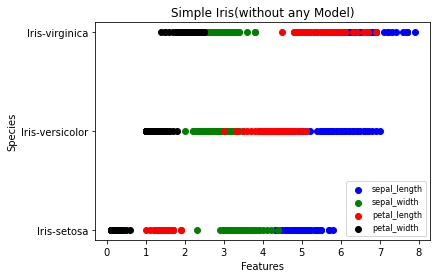

In [86]:
# Splitting the dataset into the Training set and Test set

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)
print(X.shape) #150rows and 4 columns
print(y.shape)
print(f"x_Training={X_train}")
print(f"y_Training={y_train}")




#conver picies column(y_pred) to numerical by onehotencoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')
y_test_encoder= onehotencoder.fit_transform(y_test.reshape(-1,1))
# y - will be sparse matrix of type '<class 'numpy.float64'>
# if you want it to be a array you need to 
print(f"y_Test(OneHotEncoding)={y_test_encoder.toarray()}")

# Plot the relation of each feature with each species(simple diagram without any models)
plt.xlabel('Features')
plt.ylabel('Species')

pltX = dataset.loc[:, 'SepalLengthCm']
pltY = dataset.loc[:,'Species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = dataset.loc[:, 'SepalWidthCm']
pltY = dataset.loc[:,'Species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = dataset.loc[:, 'PetalLengthCm']
pltY = dataset.loc[:,'Species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = dataset.loc[:, 'PetalWidthCm']
pltY = dataset.loc[:,'Species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.title("Simple Iris(without any Model)")
plt.legend(loc=4, prop={'size':8})
plt.show()



In [87]:
#preprocessing befor Model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [88]:
# Fitting Logistic Regression to the Training set - and  calculate time consuming
import time
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
start=time.time()
classifier.fit(X_train,y_train) #training the model
stop=time.time()
Logistic_Time=round(stop - start,7)
print(f"Logistic Regression[Training time]={Logistic_Time}s")

Logistic Regression[Training time]=0.0070024s


In [89]:
#TEst the model
y_pred=classifier.predict(X_test)
# print(f"y_prediction={y_pred}")


from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

#show accuracy of prediction
print(f"Logistic Regression[Prediction accuracy]={round(accuracy,2)}")

#convert picies column(y_pred) to numerical by oneHotencoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')
y_pred_encoder= onehotencoder.fit_transform(y_pred.reshape(-1,1))
# #y - will be sparse matrix of type '<class 'numpy.float64'>
# #if you want it to be a array you need to 
# print(f"y_prediction(OneHtEncoder)={y_pred_encoder.toarray()}")

#calculate Training Error rate(MSE)
# print(y_pred_encoder.shape)
# print(y_test_encoder.shape)
# print(f"subtract={(y_test_encoder-y_pred_encoder).shape}")
mse_Logistic=mean_squared_error(y_test_encoder.toarray(),y_pred_encoder.toarray())
print(f"Logistic Regression(Training Error Rate)={mse_Logistic}")

Logistic Regression[Prediction accuracy]=0.93
Logistic Regression(Training Error Rate)=0.044444444444444446


In [90]:
# Fitting K_NN to the Training set - and  calculate time consuming
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
start=time.time()
classifier1.fit(X_train,y_train)
stop=time.time()
K_NN_Time=round(stop - start,7)
print(f"K_NN[Training time]={K_NN_Time}s")

K_NN[Training time]=0.0009785s


In [91]:
#TEst the K_NN model and show accuracy of prediction
y_pred=classifier1.predict(X_test)
# print(y_pred)

#show accuracy of prediction
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,y_pred)
print(f"K_NN[Prediction accuracy]={round(accuracy1,2)}")


#convert picies column(y_pred) to numerical by onehotencoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')
y_pred_encoder= onehotencoder.fit_transform(y_pred.reshape(-1,1))

#calculate Training Error rate(MSE)
mse_K_NN=mean_squared_error(y_test_encoder.toarray(),y_pred_encoder.toarray())
print(f"K_NN(Training Error Rate)={mse_K_NN}")


K_NN[Prediction accuracy]=0.93
K_NN(Training Error Rate)=0.044444444444444446


In [92]:
# Fitting SVM to the Training set - and  calculate time consuming
from sklearn.svm import SVC
classifier2=SVC(kernel='linear',random_state=0)
start=time.time()
classifier2.fit(X_train,y_train)
stop=time.time()
SVM_Time=round(stop - start,7)
print(f"SVM[Training time]={SVM_Time}s")

SVM[Training time]=0.0029862s


In [93]:
#TEst the SVM model and show accuracy of prediction
y_pred2=classifier2.predict(X_test)
# print(y_pred)

#show accuracy of prediction
from sklearn.metrics import accuracy_score
accuracy2=accuracy_score(y_test,y_pred2)
print(f"SVM[Prediction accuracy]={round(accuracy2,2)}")


#convert picies column(y_pred) to numerical by onehotencoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')
y_pred_encoder2= onehotencoder.fit_transform(y_pred2.reshape(-1,1))

#calculate Training Error rate(MSE)
mse_SVM=mean_squared_error(y_test_encoder.toarray(),y_pred_encoder2.toarray())
print(f"SVM(Training Error Rate)={mse_SVM}")


SVM[Prediction accuracy]=0.93
SVM(Training Error Rate)=0.044444444444444446


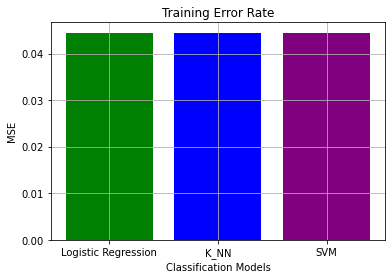

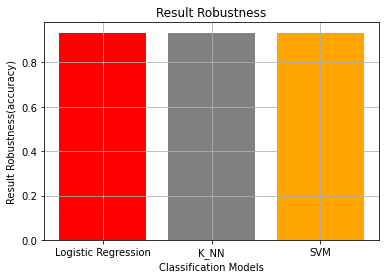

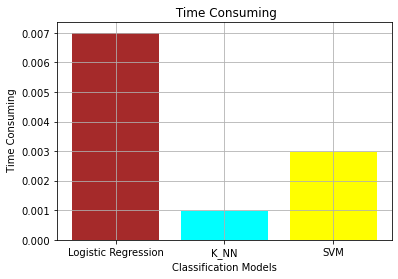

In [95]:
import matplotlib.pyplot as plt

#plot Training error rate
y_axis=[mse_Logistic,mse_K_NN,mse_SVM]
x_axis=["Logistic Regression","K_NN","SVM"]
New_Colors = ['green','blue','purple']
plt.bar(x_axis,y_axis,color=New_Colors)
plt.title('Training Error Rate')
plt.ylabel('MSE')
plt.xlabel('Classification Models')
plt.grid(True)
plt.show()

#plot  accuracy of Prediction
y_axis=[accuracy,accuracy1,accuracy2]
x_axis=["Logistic Regression","K_NN","SVM"]
New_Colors = ['red','gray','orange']
plt.bar(x_axis,y_axis,color=New_Colors)
plt.title('Result Robustness')
plt.ylabel('Result Robustness(accuracy)')
plt.xlabel('Classification Models')
plt.grid(True)
plt.show()


#plot Time Consuming
y_axis=[Logistic_Time,K_NN_Time,SVM_Time]
x_axis=["Logistic Regression","K_NN","SVM"]
New_Colors = ['brown','cyan','yellow']
plt.bar(x_axis,y_axis,color=New_Colors)
plt.title(' Time Consuming')
plt.ylabel(' Time Consuming')
plt.xlabel('Classification Models')
plt.grid(True)
plt.show()
